# Carregando o conjunto MNIST

In [1]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


Visualizando apenas um número escrito a mão.

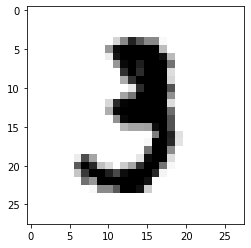

In [24]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(X[10].reshape(28, 28), cmap='binary')
plt.axis('on');

In [25]:
y[10]

'3'

In [ ]:
# Visualizando o array de características do número escrito a mão.
print(X[5])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  13.  25. 100. 122.   7.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  33.
 151. 208. 252. 252. 252. 146.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

O código abaixo gera vários exemplos randomicos para cada número e associa.

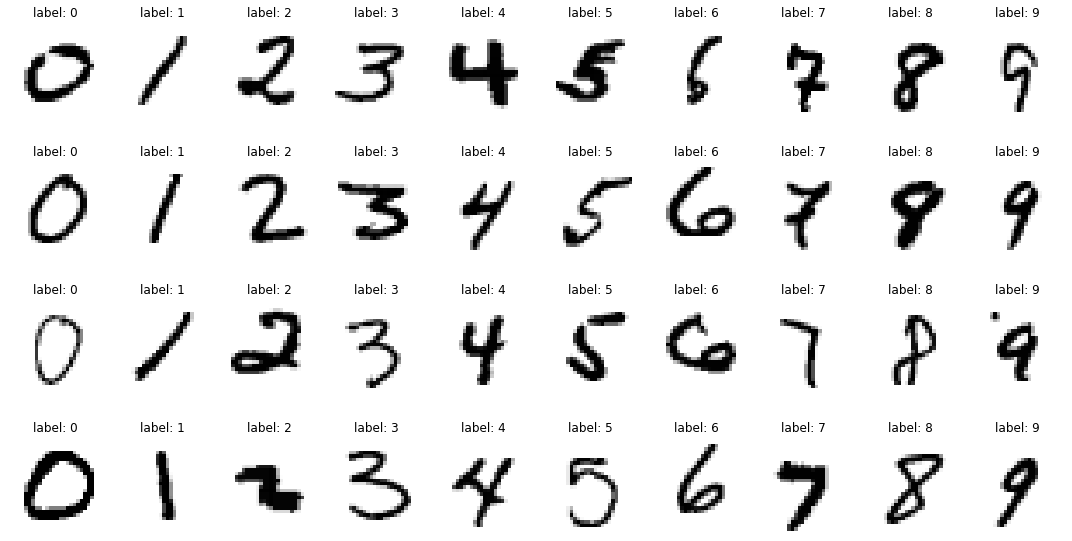

In [26]:
n_distinct_digits=10
n_samples_for_each_distinct_digits=4

num_row = n_samples_for_each_distinct_digits
num_col = n_distinct_digits

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5 * num_col, 2 * num_row), sharex=True, sharey=True)

for i in range(n_distinct_digits):
    n_random_digits_for_each_distinct_digit = np.random.choice(np.where(y == str(i))[0], size=n_samples_for_each_distinct_digits)
    for idx, j in enumerate(n_random_digits_for_each_distinct_digit):
        axes[idx][i].imshow(X[j].reshape(28, 28), cmap='binary')
        axes[idx][i].set_title('label: {}'.format(y[j]))
        # Turn off tick labels
        axes[idx][i].axis("off")

plt.tight_layout()
plt.show()

# PCA

## Gerar dados

Os dados foram gerados conforme etapas abaixo. Essas etapas foram baseadas no capítulo 8 do livro Mãos à Obra: Aprendizado de Máquina com Scikit-Learn & TensorFlow de Aurelien Geron, 2019, O'Reilly.

In [27]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X_train = np.empty((m, 3))
X_train[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X_train[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X_train[:, 2] = X_train[:, 0] * w1 + X_train[:, 1] * w2 + noise * np.random.randn(m)

In [28]:
X_train[:1]

array([[-1.01570027, -0.55091331, -0.26132626]])

## Cálculo manual

1. Calular os componentes principais

In [29]:
import numpy as np

X_train_centered = X_train - X_train.mean(axis=0)
U, s, Vt = np.linalg.svd(X_train_centered)

c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

2. Projetar

In [30]:
W2 = Vt.T[:, :2]
X2D = X_train_centered.dot(W2)

In [31]:
X2D[:4]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856]])

## Calculo com o Scikit-Learn

In [38]:
X_train = X[0:30000, :]

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X_train)

In [50]:
X_train.shape

(30000, 784)

In [51]:
X2D.shape

(30000, 153)

## Taxa de variância explicada

In [55]:
pca.explained_variance_ratio_

array([0.09936047, 0.07150752])

In [56]:
sum(pca.explained_variance_ratio_)

0.1708679882046389

In [57]:
1-sum(pca.explained_variance_ratio_)

0.8291320117953611

## Escolhendo o número de dimensões via variância de 95%

In [46]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [47]:
X_reduced.shape

(30000, 153)

## Escolhendo o número de dimensões usando a curva de variância explicada acumulada

Para testar esse método iremos utilizar a base de dados MNIST com apenas 10.000 imagens de digitos escritos à mão.

In [48]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [58]:
X_train = X[:30000]
y_train = y[:30000]

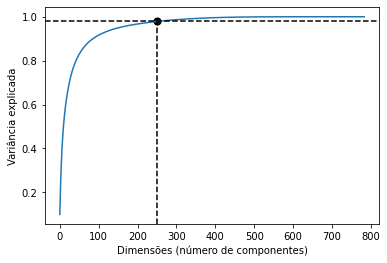

In [59]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.axvline(x=250, ymax=0.95, ls='--', color='black')
plt.axhline(y=0.98, xmax=750, ls='--', color='black')
plt.scatter(250, 0.98, s=50, c='black')
plt.xlabel('Dimensões (número de componentes)')
plt.ylabel('Variância explicada');

## PCA para compressão

In [73]:
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [74]:
X_reduced.shape

(30000, 153)

In [75]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = 'binary', **options)
    plt.axis("off")

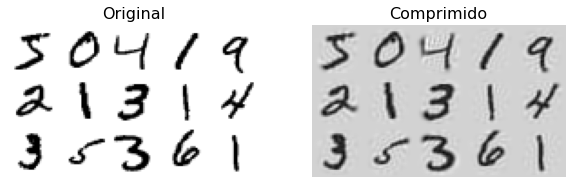

In [76]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
plot_digits(X_train[:15])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[:15])
plt.title("Comprimido", fontsize=16);